# WORKING DOC

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [2]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'NoneType'>
Kraken secren data type: <class 'NoneType'>


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [3]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

In [4]:
# Connect to Kraken and load the available cryptocurrencies
crypto_details = exchange.load_markets()
crypto_details['BTC/USD']['symbol']

'BTC/USD'

### Fetch Historical Data for LINK/USDT
Note: Other options include ADA, BCH, DAI, DOT, EOS, ETH, LINK, LTC, USDC, BTC, DOGE and XRP

In [5]:
# Fetch daily candlestick bar data from `BTC/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1h")
historical_prices[2]

[1620208800000, 48.82975, 49.13521, 48.23689, 48.23689, 1073.85734653]

In [6]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume
0,1620201600000,50.00000,50.04360,48.99300,49.47818,2156.407275
1,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836
2,1620208800000,48.82975,49.13521,48.23689,48.23689,1073.857347
3,1620212400000,48.53629,48.74603,47.95308,47.95308,1658.731508
4,1620216000000,47.97447,48.95922,47.90000,48.70456,1012.533240


'____________________________________'

'historical_prices_df shape: (720, 6)'

### Convert Epoch Timestamp to Readable Date Format

In [7]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume,date
0,1620201600000,50.00000,50.04360,48.99300,49.47818,2156.407275,2021-05-05 08:00:00
1,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00
2,1620208800000,48.82975,49.13521,48.23689,48.23689,1073.857347,2021-05-05 10:00:00
3,1620212400000,48.53629,48.74603,47.95308,47.95308,1658.731508,2021-05-05 11:00:00
4,1620216000000,47.97447,48.95922,47.90000,48.70456,1012.533240,2021-05-05 12:00:00


'_________________________'

'historical_prices_df shape: (720, 7)'

In [8]:
# historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df.set_index(pd.to_datetime(
    historical_prices_df['date'], 
    infer_datetime_format=True), 
    inplace=True
)
historical_prices_df

,timestamp,open,high,low,close,volume,date
date,,,,,,,
2021-05-05 08:00:00,1620201600000,50.00000,50.04360,48.99300,49.47818,2156.407275,2021-05-05 08:00:00
2021-05-05 09:00:00,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00
2021-05-05 10:00:00,1620208800000,48.82975,49.13521,48.23689,48.23689,1073.857347,2021-05-05 10:00:00
2021-05-05 11:00:00,1620212400000,48.53629,48.74603,47.95308,47.95308,1658.731508,2021-05-05 11:00:00
2021-05-05 12:00:00,1620216000000,47.97447,48.95922,47.90000,48.70456,1012.533240,2021-05-05 12:00:00
...,...,...,...,...,...,...,...
2021-06-04 03:00:00,1622775600000,30.02904,30.42582,29.55684,30.21363,3789.520773,2021-06-04 03:00:00
2021-06-04 04:00:00,1622779200000,30.13033,30.13033,29.64362,29.65157,2163.772336,2021-06-04 04:00:00
2021-06-04 05:00:00,1622782800000,29.75375,29.82287,28.45945,28.65569,19716.250690,2021-06-04 05:00:00


### Plot Daily Returns

In [9]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].pct_change()
historical_prices_df = historical_prices_df.dropna() 
historical_prices_df

,timestamp,open,high,low,close,volume,date,daily_return
date,,,,,,,,
2021-05-05 09:00:00,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00,-0.014806
2021-05-05 10:00:00,1620208800000,48.82975,49.13521,48.23689,48.23689,1073.857347,2021-05-05 10:00:00,-0.010436
2021-05-05 11:00:00,1620212400000,48.53629,48.74603,47.95308,47.95308,1658.731508,2021-05-05 11:00:00,-0.005884
2021-05-05 12:00:00,1620216000000,47.97447,48.95922,47.90000,48.70456,1012.533240,2021-05-05 12:00:00,0.015671
2021-05-05 13:00:00,1620219600000,48.89789,49.15562,48.02820,48.09481,733.739207,2021-05-05 13:00:00,-0.012519
...,...,...,...,...,...,...,...,...
2021-06-04 03:00:00,1622775600000,30.02904,30.42582,29.55684,30.21363,3789.520773,2021-06-04 03:00:00,0.008389
2021-06-04 04:00:00,1622779200000,30.13033,30.13033,29.64362,29.65157,2163.772336,2021-06-04 04:00:00,-0.018603
2021-06-04 05:00:00,1622782800000,29.75375,29.82287,28.45945,28.65569,19716.250690,2021-06-04 05:00:00,-0.033586


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)
#### 9, 20, 50, 200

In [10]:
# Set short and long windows


# Construct EMAS for short and long windows, respectively 9, 20, 50 and 200
historical_prices_df['EMA_9'] = historical_prices_df['close'].ewm(halflife=9).mean()
historical_prices_df['EMA_20'] = historical_prices_df['close'].ewm(halflife=20).mean()
historical_prices_df['EMA_50'] = historical_prices_df['close'].ewm(halflife=50).mean()
historical_prices_df['EMA_200'] = historical_prices_df['close'].ewm(halflife=200).mean()

# Construct a 9 VS 20 crossover trading signal
historical_prices_df['crossover_long_9v20'] = np.where(historical_prices_df['EMA_9'] > historical_prices_df['EMA_20'], 1.0, 0.0)
historical_prices_df['crossover_short_9v20'] = np.where(historical_prices_df['EMA_9'] < historical_prices_df['EMA_20'], -1.0, 0.0)
historical_prices_df['crossover_signal_9v20'] = historical_prices_df['crossover_long_9v20'] + historical_prices_df['crossover_short_9v20']


# Construct a 50 VS 200 crossover trading signal
historical_prices_df['crossover_long_50v200'] = np.where(historical_prices_df['EMA_50'] > historical_prices_df['EMA_200'], 1.0, 0.0)
historical_prices_df['crossover_short_50v200'] = np.where(historical_prices_df['EMA_50'] < historical_prices_df['EMA_200'], -1.0, 0.0)
historical_prices_df['crossover_signal_50v200'] = historical_prices_df['crossover_long_50v200'] + historical_prices_df['crossover_short_50v200']


historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,EMA_50,EMA_200,crossover_long_9v20,crossover_short_9v20,crossover_signal_9v20,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200
date,,,,,,,,,,,,,,,,,,
2021-05-05 09:00:00,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00,-0.014806,48.745590,48.745590,48.745590,48.745590,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05 10:00:00,1620208800000,48.82975,49.13521,48.23689,48.23689,1073.857347,2021-05-05 10:00:00,-0.010436,48.481450,48.486833,48.489477,48.490799,0.0,-1.0,-1.0,0.0,-1.0,-1.0
2021-05-05 11:00:00,1620212400000,48.53629,48.74603,47.95308,47.95308,1658.731508,2021-05-05 11:00:00,-0.005884,48.291602,48.302715,48.308194,48.310938,0.0,-1.0,-1.0,0.0,-1.0,-1.0
2021-05-05 12:00:00,1620216000000,47.97447,48.95922,47.90000,48.70456,1012.533240,2021-05-05 12:00:00,0.015671,48.407056,48.408457,48.409355,48.409856,0.0,-1.0,-1.0,0.0,-1.0,-1.0
2021-05-05 13:00:00,1620219600000,48.89789,49.15562,48.02820,48.09481,733.739207,2021-05-05 13:00:00,-0.012519,48.334637,48.341306,48.344690,48.346409,0.0,-1.0,-1.0,0.0,-1.0,-1.0


In [11]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200


### Plot Exponential Moving Average of Closing Prices 9 VS 20

<AxesSubplot:xlabel='date'>

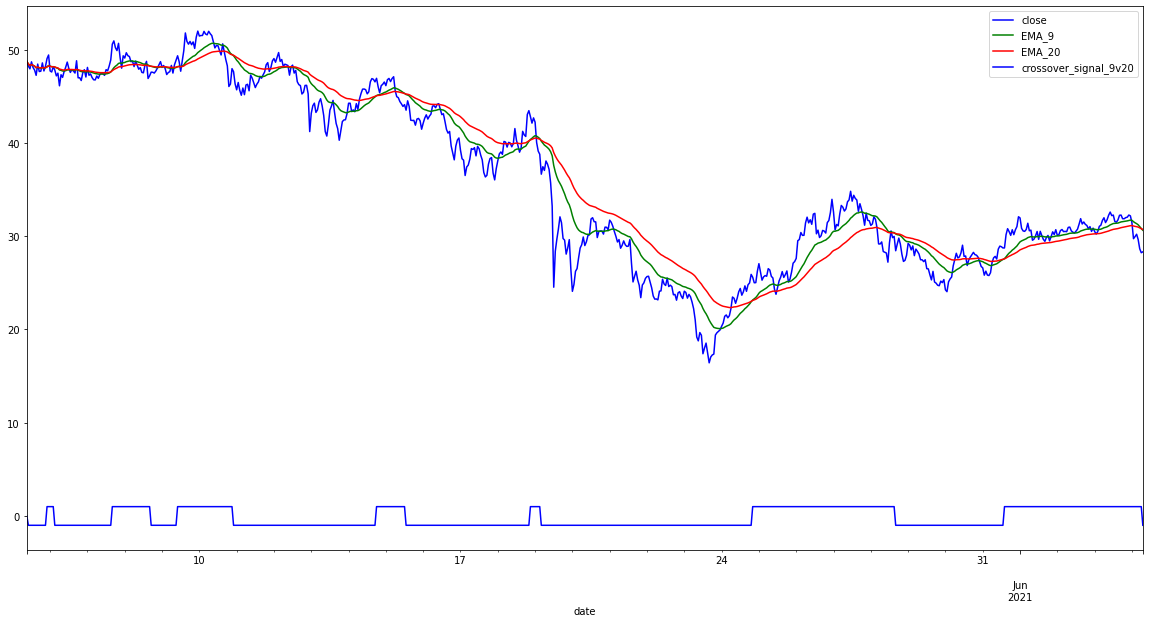

In [12]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'crossover_signal_9v20']].plot(figsize=(20,10), color=['b', 'g', 'r', 'b'])

In [13]:
### Plot Exponential Moving Average of Closing Prices 50 VS 200

<AxesSubplot:xlabel='date'>

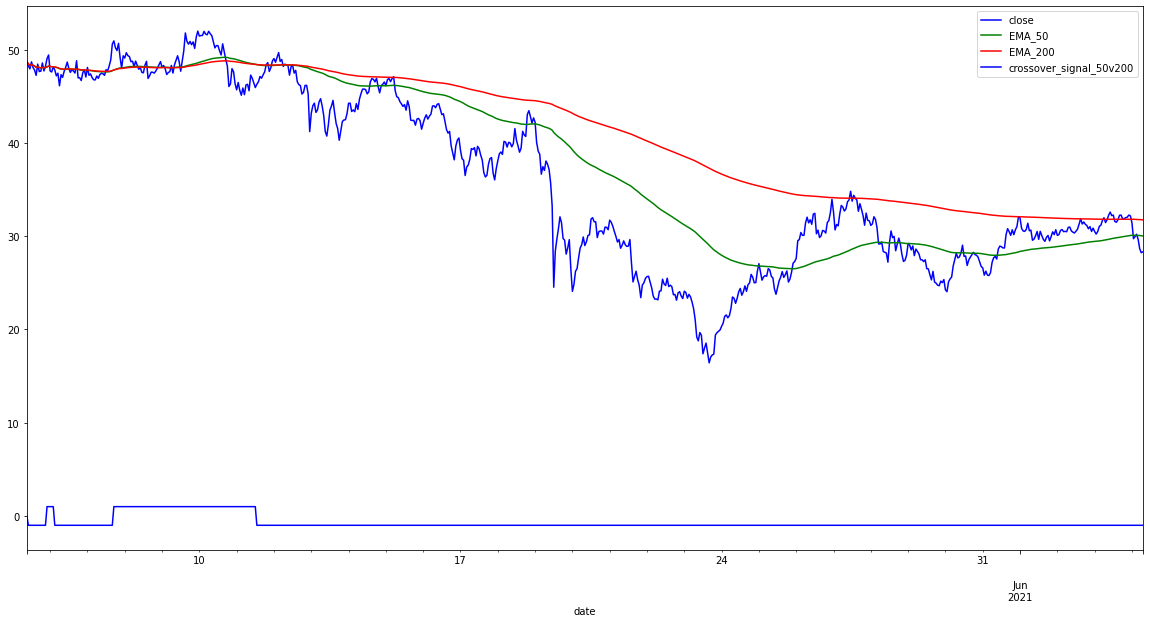

In [14]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_50', 'EMA_200', 'crossover_signal_50v200']].plot(figsize=(20,10), color=['b', 'g', 'r', 'b'])

<AxesSubplot:xlabel='date'>

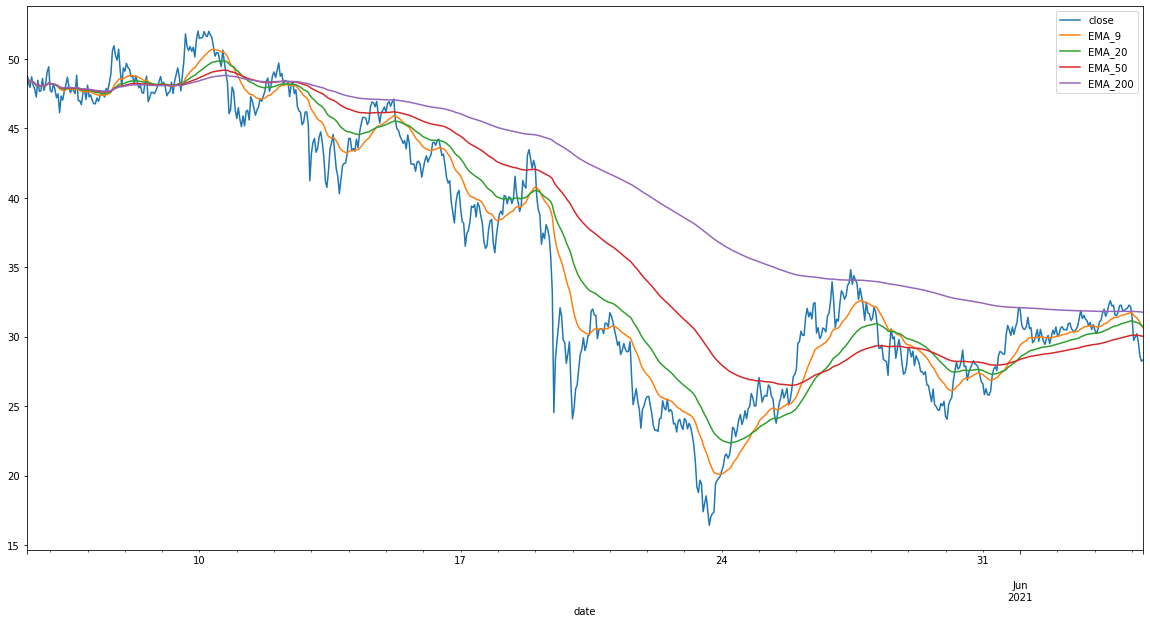

In [15]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [16]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.iloc[50:60]

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-07 11:00:00,1620385200000,47.18060,47.36372,46.90566,47.25575,1005.379015,2021-05-07 11:00:00,-0.003577,47.385221,47.526460,...,0.0,-1.0,-1.0,47.322064,0.502873,47.824937,46.819191,0.0,0.0,0.0
2021-05-07 12:00:00,1620388800000,47.18303,47.94481,46.76898,47.86636,684.574321,2021-05-07 12:00:00,0.012921,47.421547,47.540326,...,0.0,-1.0,-1.0,47.340186,0.516127,47.856313,46.824058,0.0,-1.0,-1.0
2021-05-07 13:00:00,1620392400000,47.92185,48.43207,47.73915,47.74488,1026.643578,2021-05-07 13:00:00,-0.002538,47.445926,47.548614,...,0.0,-1.0,-1.0,47.286429,0.395866,47.682296,46.890563,0.0,-1.0,-1.0
2021-05-07 14:00:00,1620396000000,47.82243,48.26374,47.45800,48.26374,285.279954,2021-05-07 14:00:00,0.010867,47.507509,47.577404,...,0.0,-1.0,-1.0,47.350011,0.445158,47.795169,46.904853,0.0,-1.0,-1.0
2021-05-07 15:00:00,1620399600000,48.07418,49.60169,48.01685,48.91242,8605.109763,2021-05-07 15:00:00,0.013440,47.613177,47.630820,...,0.0,-1.0,-1.0,47.445632,0.557291,48.002923,46.888341,0.0,-1.0,-1.0
2021-05-07 16:00:00,1620403200000,48.91247,51.01871,48.91247,50.59877,6927.099847,2021-05-07 16:00:00,0.034477,47.837489,47.748870,...,0.0,-1.0,-1.0,47.640571,0.874408,48.514978,46.766163,0.0,-1.0,-1.0
2021-05-07 17:00:00,1620406800000,50.43016,51.87230,50.34461,50.95054,9228.021958,2021-05-07 17:00:00,0.006952,48.071143,47.875493,...,1.0,0.0,1.0,47.811708,1.144428,48.956136,46.667280,0.0,-1.0,-1.0
2021-05-07 18:00:00,1620410400000,51.04277,51.04277,50.09428,50.22248,1073.284961,2021-05-07 18:00:00,-0.014290,48.232464,47.967807,...,1.0,0.0,1.0,47.929725,1.265230,49.194955,46.664495,0.0,-1.0,-1.0
2021-05-07 19:00:00,1620414000000,49.96071,49.98271,49.35649,49.91063,2941.090550,2021-05-07 19:00:00,-0.006209,48.358195,48.043824,...,1.0,0.0,1.0,48.071368,1.322124,49.393492,46.749243,0.0,-1.0,-1.0


### Plot Bollinger Bands

<AxesSubplot:xlabel='date'>

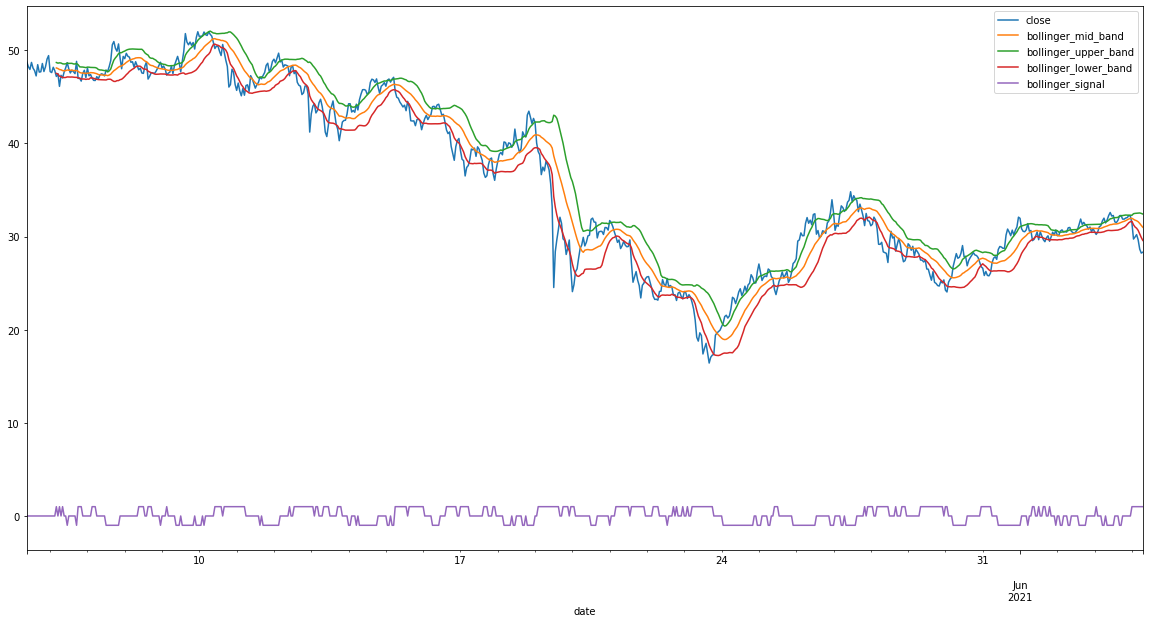

In [17]:
# Plot the Bollinger Bands for BTC/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band', 'bollinger_signal']].plot(figsize=(20,10))

### Build MACD Signals

In [18]:

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_12'] = historical_prices_df['close'].ewm(span=12, adjust=False).mean()
historical_prices_df['mac_slow_26'] = historical_prices_df['close'].ewm(span=26, adjust=False).mean()

# Build the Macd line and the Signal Line
macd = historical_prices_df['mac_fast_12'] - historical_prices_df['mac_slow_26']
historical_prices_df['macd'] = macd
historical_prices_df['mac_signal_line_9ema'] = macd.ewm(span=9, adjust=False).mean()

# Calculate difference between macd and signal
macd_diff = historical_prices_df['macd'] - historical_prices_df['mac_signal_line_9ema']
historical_prices_df['macd_diff'] = macd_diff


# Construct a macd trading signal
historical_prices_df['macd_long'] = np.where(historical_prices_df['macd_diff'] > 0, 1.0, 0.0)
historical_prices_df['macd_short'] = np.where(historical_prices_df['macd_diff'] < 0, -1.0, 0.0)
historical_prices_df['macd_signal'] = historical_prices_df['macd_long'] + historical_prices_df['macd_short']

# Construct a conservative trading signal
historical_prices_df['macd_diff_shift'] = historical_prices_df['macd_diff'].shift(1)
historical_prices_df['macd_diff_gradient'] = ( (historical_prices_df['macd_diff'] - historical_prices_df['macd_diff_shift']) / (historical_prices_df['macd_diff_shift']) )

historical_prices_df['macd_conservative_long_exit'] = np.where(historical_prices_df['macd_diff_gradient'] < 0, -1.0, 0.0)
historical_prices_df['macd_conservative_short_exit'] = np.where(historical_prices_df['macd_diff_gradient'] > 0, 1.0, 0.0)


mac_list = ['close', 'mac_fast_12', 'mac_slow_26', 'macd', 'mac_signal_line_9ema', 'macd_diff', 'macd_long', 'macd_short', 'macd_signal', 'macd_diff_shift', 'macd_diff_gradient', 'macd_conservative_long_exit', 'macd_conservative_short_exit']
historical_prices_df[mac_list].iloc[50:100]

,close,mac_fast_12,mac_slow_26,macd,mac_signal_line_9ema,macd_diff,macd_long,macd_short,macd_signal,macd_diff_shift,macd_diff_gradient,macd_conservative_long_exit,macd_conservative_short_exit
date,,,,,,,,,,,,,
2021-05-07 11:00:00,47.25575,47.277824,47.412209,-0.134385,-0.174349,0.039964,1.0,0.0,1.0,0.041451,-0.035888,-1.0,0.0
2021-05-07 12:00:00,47.86636,47.368368,47.445850,-0.077482,-0.154976,0.077494,1.0,0.0,1.0,0.039964,0.939098,0.0,1.0
2021-05-07 13:00:00,47.74488,47.426293,47.468000,-0.041707,-0.132322,0.090614,1.0,0.0,1.0,0.077494,0.169317,0.0,1.0
2021-05-07 14:00:00,48.26374,47.555131,47.526944,0.028187,-0.100220,0.128407,1.0,0.0,1.0,0.090614,0.417070,0.0,1.0
2021-05-07 15:00:00,48.91242,47.763944,47.629572,0.134373,-0.053302,0.187674,1.0,0.0,1.0,0.128407,0.461558,0.0,1.0
2021-05-07 16:00:00,50.59877,48.200071,47.849512,0.350559,0.027471,0.323089,1.0,0.0,1.0,0.187674,0.721538,0.0,1.0
2021-05-07 17:00:00,50.95054,48.623220,48.079218,0.544002,0.130777,0.413225,1.0,0.0,1.0,0.323089,0.278985,0.0,1.0
2021-05-07 18:00:00,50.22248,48.869260,48.237978,0.631282,0.230878,0.400404,1.0,0.0,1.0,0.413225,-0.031027,-1.0,0.0
2021-05-07 19:00:00,49.91063,49.029471,48.361878,0.667593,0.318221,0.349372,1.0,0.0,1.0,0.400404,-0.127452,-1.0,0.0


<AxesSubplot:xlabel='date'>

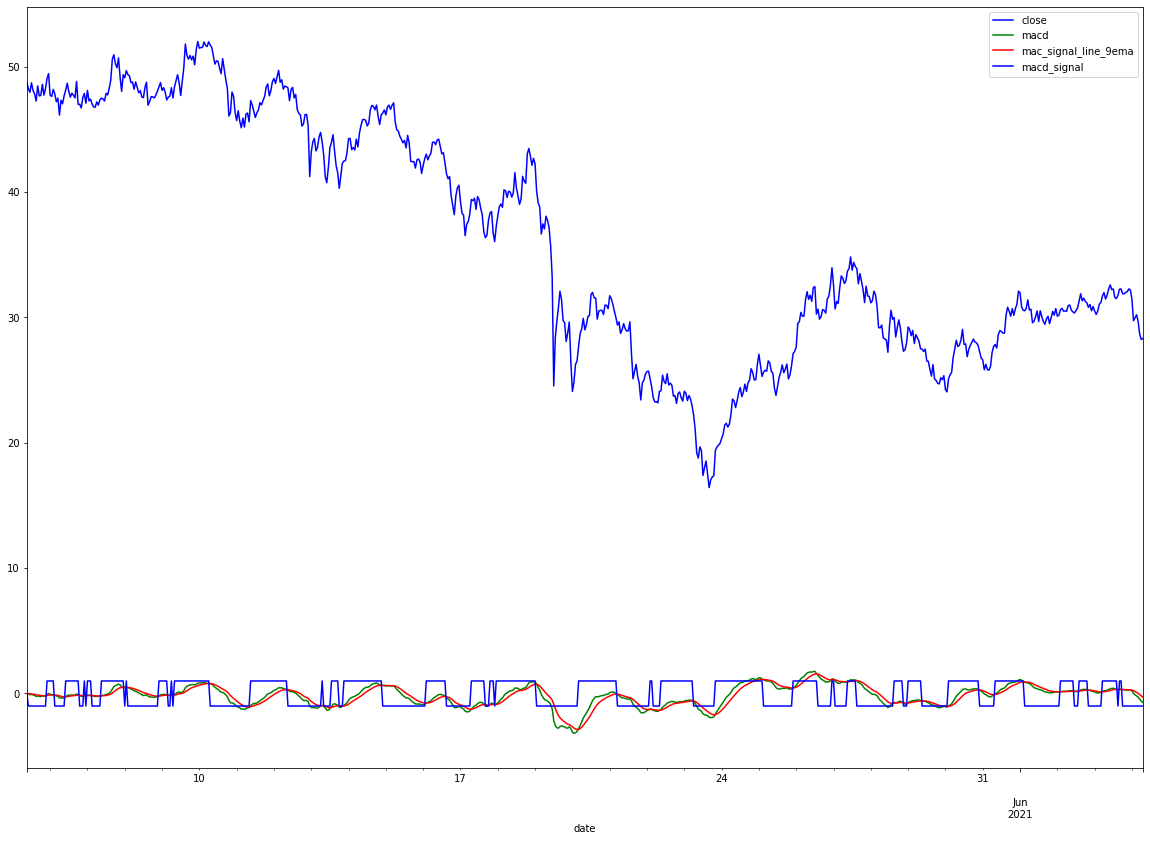

In [19]:
historical_prices_df[['close', 'macd','mac_signal_line_9ema', 'macd_signal']].plot(figsize=(20,14), color=['b', 'g', 'r', 'b'])

In [20]:
### SAVE FOR LATER ####
## A conservative, yet effective way to use the macd is to exit your position the second the MACD-SIGNAL value starts to decrease.
##### i.e. if you're in a long position, and the mac

# historical_prices_df['macd_less_signal_diff'] = historical_prices_df['macd_less_signal']diff()
# historical_prices_df.head()

In [21]:
# historical_prices_df[['close','macd','macd_signal']].plot(figsize=(20,10))

# historical_prices_df[['macd_less_signal', 'macd_less_signal_slope', 'mac_signal']].plot(figsize=(20,10))
# plt.axhline(y=0, color='r', linestyle='-')


# SO, A CONSERVATIVE MACD SIGNAL WOULD SAY, CLOSE POSITION WHEN THE ORANGE LINE CROSSES BACK ABOVE THE ZERO LINE. 
# YOU EXIT YOUR POSITIONS EARLY AND OFTEN MISS BIG GAINS, HOWEVER, YOUR LIKELINESS TO TAKE HOME PROFIT IS HIGHER.

### Build RSI Signals

In [22]:
n = 14

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

historical_prices_df['change'] = historical_prices_df['close'].diff()
historical_prices_df['gain'] = historical_prices_df.change.mask(historical_prices_df.change < 0, 0.0)
historical_prices_df['loss'] = -historical_prices_df.change.mask(historical_prices_df.change > 0, -0.0)
historical_prices_df['avg_gain'] = rma(historical_prices_df.gain[n+1:].to_numpy(), n, np.nansum(historical_prices_df.gain.to_numpy()[:n+1])/n)
historical_prices_df['avg_loss'] = rma(historical_prices_df.loss[n+1:].to_numpy(), n, np.nansum(historical_prices_df.loss.to_numpy()[:n+1])/n)
historical_prices_df['rs'] = historical_prices_df.avg_gain / historical_prices_df.avg_loss
historical_prices_df['rsi_14'] = 100 - (100 / (1 + historical_prices_df.rs))

historical_prices_df.head()


,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,macd_diff_gradient,macd_conservative_long_exit,macd_conservative_short_exit,change,gain,loss,avg_gain,avg_loss,rs,rsi_14
date,,,,,,,,,,,,,,,,,,,,,
2021-05-05 09:00:00,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00,-0.014806,48.745590,48.745590,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-05 10:00:00,1620208800000,48.82975,49.13521,48.23689,48.23689,1073.857347,2021-05-05 10:00:00,-0.010436,48.481450,48.486833,...,-inf,-1.0,0.0,-0.50870,0.00000,0.50870,NaN,NaN,NaN,NaN
2021-05-05 11:00:00,1620212400000,48.53629,48.74603,47.95308,47.95308,1658.731508,2021-05-05 11:00:00,-0.005884,48.291602,48.302715,...,1.129992,0.0,1.0,-0.28381,0.00000,0.28381,NaN,NaN,NaN,NaN
2021-05-05 12:00:00,1620216000000,47.97447,48.95922,47.90000,48.70456,1012.533240,2021-05-05 12:00:00,0.015671,48.407056,48.408457,...,-0.416804,-1.0,0.0,0.75148,0.75148,0.00000,NaN,NaN,NaN,NaN
2021-05-05 13:00:00,1620219600000,48.89789,49.15562,48.02820,48.09481,733.739207,2021-05-05 13:00:00,-0.012519,48.334637,48.341306,...,0.456537,0.0,1.0,-0.60975,0.00000,0.60975,NaN,NaN,NaN,NaN


In [23]:
# Construct a rsi trading signal
historical_prices_df['rsi_oversold'] = np.where(historical_prices_df['rsi_14'] < 30, 1.0, 0.0)
historical_prices_df['rsi_overbought'] = np.where(historical_prices_df['rsi_14'] > 70, 1.0, 0.0)


# Set x variable list of features
rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold'] # NEED TO ADD 'rsi_signal',

historical_prices_df[rsi_list].iloc[70:80]
# historical_prices_df.head()

,close,daily_return,rs,rsi_14,rsi_overbought,rsi_oversold
date,,,,,,
2021-05-08 07:00:00,48.78166,0.012147,1.011319,50.281394,0.0,0.0
2021-05-08 08:00:00,48.33974,-0.009059,0.900405,47.379629,0.0,0.0
2021-05-08 09:00:00,47.91219,-0.008845,0.808068,44.692331,0.0,0.0
2021-05-08 10:00:00,48.08427,0.003592,0.852517,46.019390,0.0,0.0
2021-05-08 11:00:00,47.57216,-0.010650,0.746214,42.733234,0.0,0.0
2021-05-08 12:00:00,47.52641,-0.000962,0.737368,42.441658,0.0,0.0
2021-05-08 13:00:00,48.33875,0.017092,0.964046,49.084688,0.0,0.0
2021-05-08 14:00:00,48.75600,0.008632,1.089433,52.140120,0.0,0.0
2021-05-08 15:00:00,46.91839,-0.037690,0.683161,40.587960,0.0,0.0


In [24]:
# Create a lagging window in which you get a buy/sell signal

rolling_periods = 15

rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold', 'rsi_overbought_preceeding_5', 'rsi_oversold_preceeding_5'] # NEED TO ADD 'rsi_signal',
historical_prices_df['rsi_oversold_preceeding_5'] = historical_prices_df['rsi_oversold'].rolling(rolling_periods, min_periods=1).sum()
historical_prices_df['rsi_overbought_preceeding_5'] = historical_prices_df['rsi_overbought'].rolling(rolling_periods, min_periods=1).sum()

historical_prices_df['rsi_short'] = np.where(historical_prices_df['rsi_overbought_preceeding_5'] > 0, -1.0, 0.0)
historical_prices_df['rsi_long'] = np.where(historical_prices_df['rsi_oversold_preceeding_5'] > 0, 1.0, 0.0)

historical_prices_df['rsi_signal'] = historical_prices_df['rsi_long'] + historical_prices_df['rsi_short']


rsi_list = ['rs',	'rsi_14',	'rsi_overbought',	'rsi_oversold',	'rsi_overbought_preceeding_5',	'rsi_oversold_preceeding_5',	'rsi_long',	'rsi_short',	'rsi_signal']
display(historical_prices_df[rsi_list].iloc[73:89])
display(historical_prices_df[rsi_list].iloc[200:220])

,rs,rsi_14,rsi_overbought,rsi_oversold,rsi_overbought_preceeding_5,rsi_oversold_preceeding_5,rsi_long,rsi_short,rsi_signal
date,,,,,,,,,
2021-05-08 10:00:00,0.852517,46.019390,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 11:00:00,0.746214,42.733234,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 12:00:00,0.737368,42.441658,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 13:00:00,0.964046,49.084688,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 14:00:00,1.089433,52.140120,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 15:00:00,0.683161,40.587960,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 16:00:00,0.747547,42.776936,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 17:00:00,0.838631,45.611721,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 18:00:00,0.835658,45.523611,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,rs,rsi_14,rsi_overbought,rsi_oversold,rsi_overbought_preceeding_5,rsi_oversold_preceeding_5,rsi_long,rsi_short,rsi_signal
date,,,,,,,,,
2021-05-13 17:00:00,0.648616,39.343063,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 18:00:00,0.550040,35.485541,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 19:00:00,0.685455,40.668825,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 20:00:00,0.824058,45.177192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 21:00:00,0.849893,45.942807,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 22:00:00,0.854257,46.070047,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 23:00:00,0.968705,49.205189,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-14 00:00:00,1.182665,54.184450,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-14 01:00:00,1.184266,54.218036,0.0,0.0,0.0,0.0,0.0,0.0,0.0


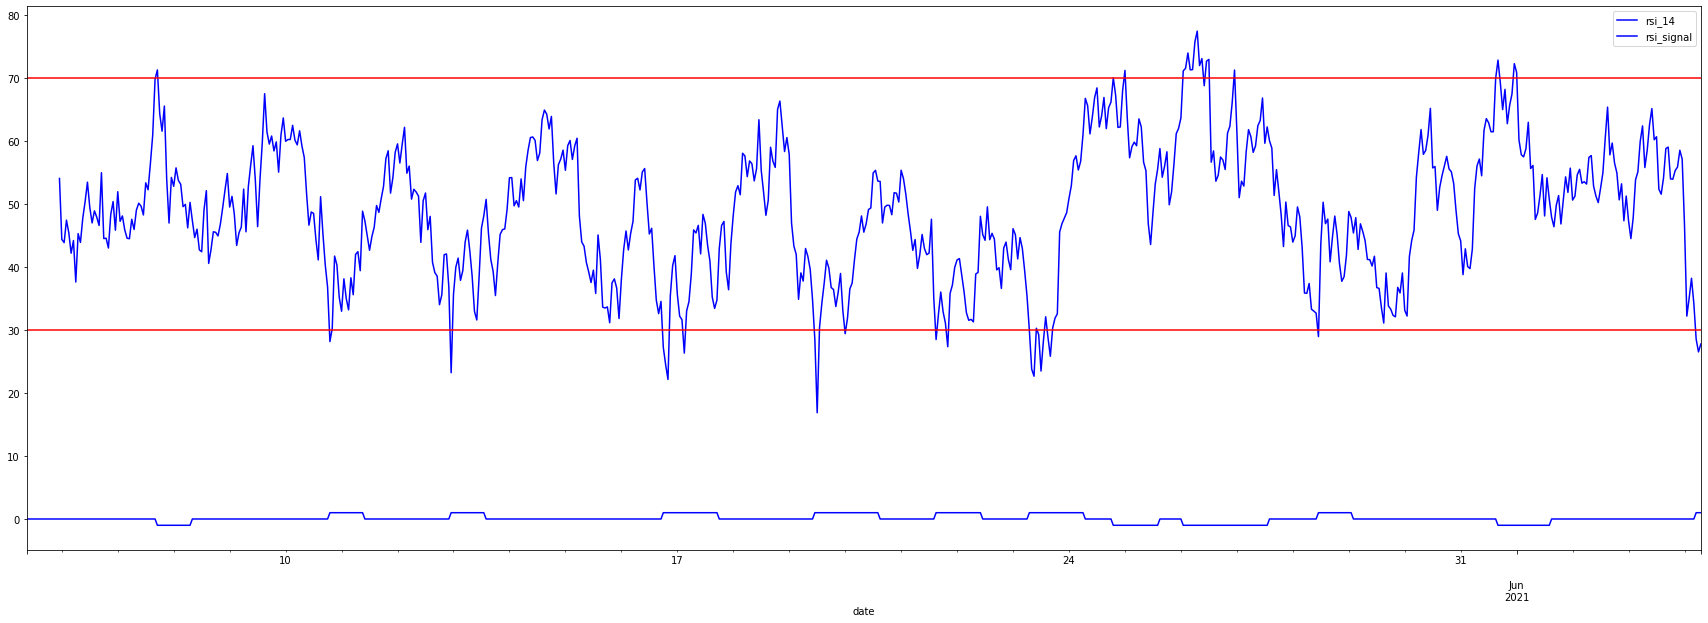

In [25]:
historical_prices_df[['rsi_14', 'rsi_signal']].plot(figsize=(30,10), color=['b', 'b'])
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='r', linestyle='-')

In [26]:
historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,avg_loss,rs,rsi_14,rsi_oversold,rsi_overbought,rsi_oversold_preceeding_5,rsi_overbought_preceeding_5,rsi_short,rsi_long,rsi_signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-05 09:00:00,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00,-0.014806,48.745590,48.745590,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05 10:00:00,1620208800000,48.82975,49.13521,48.23689,48.23689,1073.857347,2021-05-05 10:00:00,-0.010436,48.481450,48.486833,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05 11:00:00,1620212400000,48.53629,48.74603,47.95308,47.95308,1658.731508,2021-05-05 11:00:00,-0.005884,48.291602,48.302715,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05 12:00:00,1620216000000,47.97447,48.95922,47.90000,48.70456,1012.533240,2021-05-05 12:00:00,0.015671,48.407056,48.408457,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05 13:00:00,1620219600000,48.89789,49.15562,48.02820,48.09481,733.739207,2021-05-05 13:00:00,-0.012519,48.334637,48.341306,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. MACHINE LEARNING COMPONENT

## Set X-Variable List FOR EACH STRATEGY Filter to Obtain Associated Values

In [27]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
macd_diff_shift
macd_diff_gradient
macd_conservative_long_exit
macd_conservative_short_exit
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_oversold
rsi_overbought
rsi_oversold_preceeding_5
rsi_overbought_preceeding_5
rsi_short
rsi_long
rsi_signal


### Define Strategies. 
 >  Strategy 1 = EMA50v200 + BB <br />
 > Strategy 2 = br />
 > Strategy 3 = EMA50v200 + EMA10v20 + MACD

In [28]:
# Set x variable list of features
st1_x_var_list = ['close', 'crossover_signal_50v200', 'bollinger_signal'] #'rsi_signal',
st2_x_var_list = ['close', 'crossover_signal_50v200', 'macd_signal'] #'rsi_signal',
# st3_x_var_list = ['crossover_signal_50v200', 'crossover_signal_9v20', 'macd_signal']

## Strategy 1 - EMA50V200 + Bollinger

In [29]:
historical_prices_df[st1_x_var_list].iloc[550:570]

,close,crossover_signal_50v200,bollinger_signal
date,,,
2021-05-28 07:00:00,29.38763,-1.0,1.0
2021-05-28 08:00:00,28.36158,-1.0,1.0
2021-05-28 09:00:00,28.28346,-1.0,1.0
2021-05-28 10:00:00,28.20275,-1.0,1.0
2021-05-28 11:00:00,27.21826,-1.0,1.0
2021-05-28 12:00:00,29.30058,-1.0,0.0
2021-05-28 13:00:00,30.56512,-1.0,0.0
2021-05-28 14:00:00,29.84859,-1.0,0.0
2021-05-28 15:00:00,29.98545,-1.0,0.0


In [30]:
# Filter by x-variable list
strategy_1 = historical_prices_df[st1_x_var_list]



# shift the bollinger signal down, to help find the OPTIMAL Buy/sell time 
strategy_1['bollinger_shift'] = strategy_1['bollinger_signal'].shift(1)


# Define long and short position conditions
strategy_1['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_1.iloc[509:528]
strategy_1.tail(20)



,close,crossover_signal_50v200,bollinger_signal,bollinger_shift,bull_or_bear
date,,,,,
2021-06-03 12:00:00,32.26897,-1.0,-1.0,-1.0,Bear
2021-06-03 13:00:00,31.57846,-1.0,0.0,-1.0,Bear
2021-06-03 14:00:00,31.50620,-1.0,0.0,0.0,Bear
2021-06-03 15:00:00,31.75453,-1.0,0.0,0.0,Bear
2021-06-03 16:00:00,32.24510,-1.0,-1.0,0.0,Bear
2021-06-03 17:00:00,32.27026,-1.0,-1.0,-1.0,Bear
2021-06-03 18:00:00,31.87942,-1.0,0.0,-1.0,Bear
2021-06-03 19:00:00,31.87606,-1.0,0.0,0.0,Bear
2021-06-03 20:00:00,31.99642,-1.0,0.0,0.0,Bear


## Program the Conditional Logic for the Trading Strategy

In [31]:


position = 'none'
position_code = 0
positions = []
i = 0

for index, row in strategy_1.iterrows():
    
    # IF BEAR + BOLL == -1, SELL
    if (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == -1):
        position = "sell"
        position_code = -1
        positions.append(position_code)
        # positions.append(f"{index}: {position}, {position_code}")
    
    
    # ELIF BEAR + BOLL == 1, BUY / EXIT SHORT
    elif (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == 1):
        position = "none"
        position_code = 0
        positions.append(position_code)
        # positions.append(f"{index}: {position}, {position_code}")
    
    
    # ELIF BULL + BOLL == 1 BUY
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == 1):
        position = "buy"
        position_code = 1
        positions.append(position_code)
        # positions.append(f"{index}: {position}, {position_code}")    
    
    # ELIF BULL + BOLL == -1, SELL / EXIT LONG
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 0) & (row['bollinger_shift'] == -1):
        position = "none"
        position_code = 0
        positions.append(position_code)
        # positions.append(f"{index}: {position}, {position_code}")    

    
    # ELSE : O / NA
    else:
        position = position
        positions.append(position_code)
        # positions.append(f"{index}: {position}, {position_code}")

# Double check the dataframes have the same row lengths
display(len(positions))
display(strategy_1.shape)
display(historical_prices_df.shape)

719

(719, 5)

(719, 51)

In [32]:
strategy_1['boll_ema50200_position'] = positions
historical_prices_df['boll_ema50200_position'] = positions
# strategy_1[130:170]
strategy_1[695:830]

,close,crossover_signal_50v200,bollinger_signal,bollinger_shift,bull_or_bear,boll_ema50200_position
date,,,,,,
2021-06-03 08:00:00,31.76468,-1.0,-1.0,0.0,Bear,-1
2021-06-03 09:00:00,32.25316,-1.0,-1.0,-1.0,Bear,-1
2021-06-03 10:00:00,32.59143,-1.0,-1.0,-1.0,Bear,-1
2021-06-03 11:00:00,32.21288,-1.0,-1.0,-1.0,Bear,-1
2021-06-03 12:00:00,32.26897,-1.0,-1.0,-1.0,Bear,-1
2021-06-03 13:00:00,31.57846,-1.0,0.0,-1.0,Bear,-1
2021-06-03 14:00:00,31.50620,-1.0,0.0,0.0,Bear,-1
2021-06-03 15:00:00,31.75453,-1.0,0.0,0.0,Bear,-1
2021-06-03 16:00:00,32.24510,-1.0,-1.0,0.0,Bear,-1


In [33]:
historical_prices_df.head(4)

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,rs,rsi_14,rsi_oversold,rsi_overbought,rsi_oversold_preceeding_5,rsi_overbought_preceeding_5,rsi_short,rsi_long,rsi_signal,boll_ema50200_position
date,,,,,,,,,,,,,,,,,,,,,
2021-05-05 09:00:00,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00,-0.014806,48.745590,48.745590,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2021-05-05 10:00:00,1620208800000,48.82975,49.13521,48.23689,48.23689,1073.857347,2021-05-05 10:00:00,-0.010436,48.481450,48.486833,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2021-05-05 11:00:00,1620212400000,48.53629,48.74603,47.95308,47.95308,1658.731508,2021-05-05 11:00:00,-0.005884,48.291602,48.302715,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2021-05-05 12:00:00,1620216000000,47.97447,48.95922,47.90000,48.70456,1012.533240,2021-05-05 12:00:00,0.015671,48.407056,48.408457,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Strategy 2 - RSI + MACD

In [34]:
st2_x_var_list = ['close', 'rsi_signal', 'macd_signal', 'macd_conservative_long_exit', 'macd_conservative_short_exit']
historical_prices_df[st2_x_var_list].head(20)




,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit
date,,,,,
2021-05-05 09:00:00,48.74559,0.0,0.0,0.0,0.0
2021-05-05 10:00:00,48.23689,0.0,-1.0,-1.0,0.0
2021-05-05 11:00:00,47.95308,0.0,-1.0,0.0,1.0
2021-05-05 12:00:00,48.70456,0.0,-1.0,-1.0,0.0
2021-05-05 13:00:00,48.09481,0.0,-1.0,0.0,1.0
2021-05-05 14:00:00,47.82362,0.0,-1.0,0.0,1.0
2021-05-05 15:00:00,47.25746,0.0,-1.0,0.0,1.0
2021-05-05 16:00:00,48.46317,0.0,-1.0,-1.0,0.0
2021-05-05 17:00:00,47.66653,0.0,-1.0,0.0,1.0


In [35]:
# Filter by x-variable list
strategy_2 = historical_prices_df[st2_x_var_list]

# Define long and short position conditions

environment = 'none'
environments = []

for index, row in strategy_2.iterrows():

    # If RSI signal == 1, OVERSOLD. I.e. enter long position
    if (row['rsi_signal'] == 1):
        environment = "Oversold. LONG!"
        environments.append(environment)
    
    # If RSI signal == -1, OVERBOUGHT. I.e. enter short position
    elif (row['rsi_signal'] == -1):
        environment = "Overbought. SELL!"
        environments.append(environment)
    
    # Else, price is fair
    else:
        environment = "Fair price"
        environments.append(environment)

display(len(environments))
display(strategy_2.shape)
display(historical_prices_df.shape)


719

(719, 5)

(719, 52)

In [36]:
strategy_2['rsi_window'] = environments
# historical_prices_df['rsi_window'] = environments
# strategy_2[130:170]
strategy_2[50:100]

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window
date,,,,,,
2021-05-07 11:00:00,47.25575,0.0,1.0,-1.0,0.0,Fair price
2021-05-07 12:00:00,47.86636,0.0,1.0,0.0,1.0,Fair price
2021-05-07 13:00:00,47.74488,0.0,1.0,0.0,1.0,Fair price
2021-05-07 14:00:00,48.26374,0.0,1.0,0.0,1.0,Fair price
2021-05-07 15:00:00,48.91242,0.0,1.0,0.0,1.0,Fair price
2021-05-07 16:00:00,50.59877,0.0,1.0,0.0,1.0,Fair price
2021-05-07 17:00:00,50.95054,-1.0,1.0,0.0,1.0,Overbought. SELL!
2021-05-07 18:00:00,50.22248,-1.0,1.0,-1.0,0.0,Overbought. SELL!
2021-05-07 19:00:00,49.91063,-1.0,1.0,-1.0,0.0,Overbought. SELL!


In [37]:
# CREATE A MACD SIGNAL SHIFT 
strategy_2['macd_signal_shift'] = strategy_2['macd_signal'].shift(1)
strategy_2.head()

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window,macd_signal_shift
date,,,,,,,
2021-05-05 09:00:00,48.74559,0.0,0.0,0.0,0.0,Fair price,NaN
2021-05-05 10:00:00,48.23689,0.0,-1.0,-1.0,0.0,Fair price,0.0
2021-05-05 11:00:00,47.95308,0.0,-1.0,0.0,1.0,Fair price,-1.0
2021-05-05 12:00:00,48.70456,0.0,-1.0,-1.0,0.0,Fair price,-1.0
2021-05-05 13:00:00,48.09481,0.0,-1.0,0.0,1.0,Fair price,-1.0


## Program the Conditional Logic for the Trading Strategy

### Aggresive Macd. i.e hold until the next macd cross

In [38]:
st2_position = np.nan
st2_position_code = 0
st2_positions = []

for index, row in strategy_2.iterrows():

    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL (1), BUY
    if (row['rsi_signal'] == 1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] == -1):
        st2_position_code = 1
        st2_positions.append(st2_position_code)

    
    # IF RSI == OVERSOLD (1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == 1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] == 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)
    
    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL NEGATIVELY (-1), SELL
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] == 1):
        st2_position_code = -1
        st2_positions.append(st2_position_code)
    
    
    # IF RSI == OVERBOUGHT (-1) AND MACD CROSSES SIGNAL (1), BUY
    elif (row['rsi_signal'] == -1) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] == 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)

    # # IF RSI == FAIR (0) AND MACD GOES FROM 1 to -1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == -1) & (row['macd_signal_shift'] == 1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)
    
    # # IF RSI == FAIR (0) AND MACD GOES FROM -1 to 1
    elif (row['rsi_signal'] == 0) & (row['macd_signal'] == 1) & (row['macd_signal_shift'] == -1):
        st2_position_code = 0
        st2_positions.append(st2_position_code)

    # ELSE : 0 / NA
    else:
        st2_position = st2_position
        st2_positions.append(st2_position_code)


display(len(st2_positions))
display(strategy_2.shape)
display(historical_prices_df.shape)

719

(719, 7)

(719, 52)

In [51]:
strategy_2['rsi_macd_agg_position'] = st2_positions
historical_prices_df['rsi_macd_agg_position'] = st2_positions
# strategy_2[130:170]
strategy_2[400:450]

,close,rsi_signal,macd_signal,macd_conservative_long_exit,macd_conservative_short_exit,rsi_window,macd_signal_shift,rsi_macd_agg_position
date,,,,,,,,
2021-05-22 01:00:00,25.71049,1.0,-1.0,-1.0,0.0,Oversold. LONG!,-1.0,0
2021-05-22 02:00:00,25.10623,1.0,1.0,-1.0,0.0,Oversold. LONG!,-1.0,1
2021-05-22 03:00:00,24.47296,1.0,1.0,-1.0,0.0,Oversold. LONG!,1.0,1
2021-05-22 04:00:00,23.59496,1.0,-1.0,-1.0,0.0,Oversold. LONG!,1.0,0
2021-05-22 05:00:00,23.25600,1.0,-1.0,0.0,1.0,Oversold. LONG!,-1.0,0
2021-05-22 06:00:00,23.27434,1.0,-1.0,0.0,1.0,Oversold. LONG!,-1.0,0
2021-05-22 07:00:00,23.17507,1.0,-1.0,-1.0,0.0,Oversold. LONG!,-1.0,0
2021-05-22 08:00:00,24.10550,1.0,-1.0,-1.0,0.0,Oversold. LONG!,-1.0,0
2021-05-22 09:00:00,24.13861,1.0,1.0,-1.0,0.0,Oversold. LONG!,-1.0,1


# FROM THIS POINT ONWARDS, ALEX HASN'T DONE ANYTHING

### Shift the DataFrame Index by 1

In [ ]:
historical_prices_df[x_var_list] = historical_prices_df[x_var_list].shift(1)
historical_prices_df[x_var_list].tail()

### Drop NAs and Replace Infs (Positive/Negative Infinity) 

In [ ]:
# Drop NAs and replace positive/negative infinity values
historical_prices_df.dropna(subset=x_var_list, inplace=True)
historical_prices_df.dropna(subset=['daily_return'], inplace=True)
historical_prices_df = historical_prices_df.replace([np.inf, -np.inf], np.nan)
historical_prices_df.head()

### Construct the Dependent Variable

In [ ]:
historical_prices_df['Positive Return'] = np.where(historical_prices_df['daily_return'] > 0, 1.0, 0.0)
historical_prices_df.head()

### Assign Training and Testing Windows